In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

$$N = \sum_{j=0}^{D_i} \binom{D}{j}$$
- $N$ This is the total number of linear regions (the piecewise flat parts) that the neural network can create.

- $\sum_{j=0}^{D_i}$: This is the summation symbol. It means you add up a series of terms. You start with $j=0$, then $j=1$, and continue until you reach $j=D_i$.
- $D_i$: This is the number of input dimensions (e.g., $D_i=2$ if your inputs are $x_1$ and $x_2$).
- $\binom{D}{j}$: This is the binomial coefficient, read as "$D$ choose $j$." It calculates the number of ways to choose $j$ items from a set of $D$ items.
- $D$: This is the number of hidden units in the network.

In short, the formula calculates the maximum number of regions ($N$) by summing up the terms "($D$ choose 0)" + "($D$ choose 1)" + ... all the way to "($D$ choose $D_i$)."

In [4]:
def number_regions(Di, D):
  # Di - the number of input dimensions
  # D - hte number of hidden untits
  
  N = 0
  for j in range(Di + 1):
    N += math.comb(D, j)
    
  return N

In [5]:
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")

Di=2, D=3, Number of regions = 7, True value = 7


In [6]:
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

Di=10, D=50, Number of regions = 13432735556, True value = 13432735556


In [7]:
try:
  N = number_regions(10, 8)
  print(f"Di=10, D=8, Number of regions = {int(N)}, True value = 256")
except Exception as error:
    print("An exception occurred:", error)

Di=10, D=8, Number of regions = 256, True value = 256


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


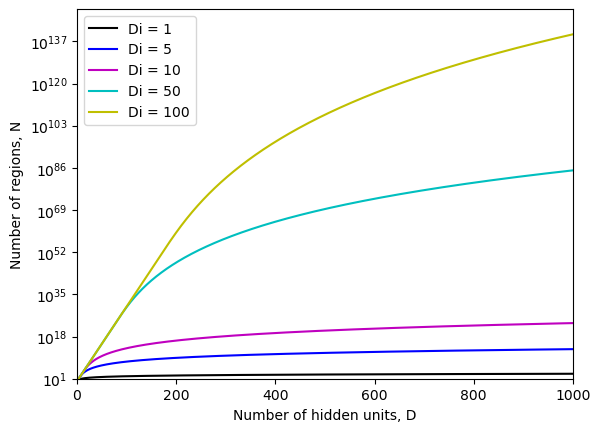

In [8]:
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for D in range(1000):
        regions[c_dim, D] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(regions[0,:],'k-')
ax.semilogy(regions[1,:],'b-')
ax.semilogy(regions[2,:],'m-')
ax.semilogy(regions[3,:],'c-')
ax.semilogy(regions[4,:],'y-')
ax.legend(['Di = 1', 'Di = 5', 'Di = 10', 'Di = 50', 'Di = 100'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,1000])
plt.ylim([1e1,1e150])
plt.show()

In [11]:
def number_parameters(D_i, D):
  # for one D(hidden unit) we need D_i(slopes) + 1(intercept) parameters
  # for f(x) with D hidden units we need D + 1 parameters
  
  return (D * (D_i + 1)) + (D + 1)

In [12]:
N = number_parameters(10, 8)
print(f"Di=10, D=8, Number of parameters = {int(N)}, True value = 97")

Di=10, D=8, Number of parameters = 97, True value = 97


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


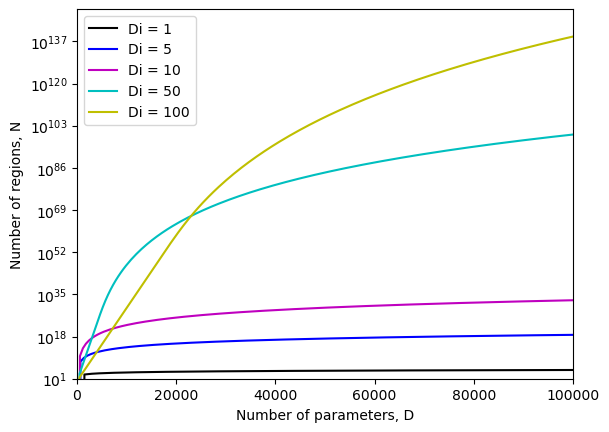

In [13]:
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 200))
params = np.zeros((dims.shape[0], 200))

# We'll compute the five lines separately this time to make it faster
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for c_hidden in range(1, 200):
        # Iterate over different ranges of number hidden variables for different input sizes
        D = int(c_hidden * 500 / D_i)
        params[c_dim, c_hidden] =  D_i * D +D + D +1
        regions[c_dim, c_hidden] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(params[0,:], regions[0,:],'k-')
ax.semilogy(params[1,:], regions[1,:],'b-')
ax.semilogy(params[2,:], regions[2,:],'m-')
ax.semilogy(params[3,:], regions[3,:],'c-')
ax.semilogy(params[4,:], regions[4,:],'y-')
ax.legend(['Di = 1', 'Di = 5', 'Di = 10', 'Di = 50', 'Di = 100'])
ax.set_xlabel("Number of parameters, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,100000])
plt.ylim([1e1,1e150])
plt.show()